 # Section 1: **Introduction**
In this project, we analyze screen time data to understand usage patterns, identify key influencing factors, and predict screen time based on app engagement metrics. The study focuses on:

* The impact of notifications and app openings on screen time.

* Daily and weekly usage trends.

* Modeling screen time prediction using machine learning.

# Data Overview

## The dataset consists of user screen time data, including:

* Date: The day of usage.

* App: The application used.

* Usage (minutes): The total time spent on an app per session.

* Notifications: The number of notifications received from the app.

* Times Opened: How many times the app was launched.

#### Objectives
* Understand screen time usage patterns.
* Analyze trends over time and app usage behavior.
* Develop a machine learning model to predict screen time.
* Evaluate the model’s accuracy and performance.


#### This notebook includes:
* Data Cleaning & Preprocessing
* Exploratory Data Analysis (EDA)
* Feature Engineering
* Machine Learning Model Training (Linear Regression & Random Forest)
* Model Evaluation & Insights

### Step 1: Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#%pip install xgboost
from xgboost import XGBRegressor



### Step 2: Load the Dataset

In [2]:
df = pd.read_csv('screentime_analysis.csv')
display(df)

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16
...,...,...,...,...,...
195,2024-08-10,LinkedIn,22,12,5
196,2024-08-23,LinkedIn,5,7,1
197,2024-08-18,LinkedIn,19,2,5
198,2024-08-26,LinkedIn,21,14,1


# Section 2: **Data Collection & Cleaning**

### Step 3: Data Cleaning & Preprocessing

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             200 non-null    object
 1   App              200 non-null    object
 2   Usage (minutes)  200 non-null    int64 
 3   Notifications    200 non-null    int64 
 4   Times Opened     200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


None

Handle missing values 

In [4]:
df.isna().sum()

Date               0
App                0
Usage (minutes)    0
Notifications      0
Times Opened       0
dtype: int64

1. General Descriptive Analysis

In [5]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Date']


0     2024-08-07
1     2024-08-08
2     2024-08-26
3     2024-08-22
4     2024-08-12
         ...    
195   2024-08-10
196   2024-08-23
197   2024-08-18
198   2024-08-26
199   2024-08-02
Name: Date, Length: 200, dtype: datetime64[ns]

In [6]:
# Add new features
df['DayOfWeek'] = df['Date'].dt.day_name()
df['IsWeekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday']).astype(int)
df['Hour'] = df['Date'].dt.hour 
display(df['DayOfWeek'], df['IsWeekend'], df['Hour'])

0      Wednesday
1       Thursday
2         Monday
3       Thursday
4         Monday
         ...    
195     Saturday
196       Friday
197       Sunday
198       Monday
199       Friday
Name: DayOfWeek, Length: 200, dtype: object

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    0
197    1
198    0
199    0
Name: IsWeekend, Length: 200, dtype: int32

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Name: Hour, Length: 200, dtype: int32

In [8]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

df['Day_of_Week'] = df['Date'].dt.day_name()  # Extract day of the week
usage_by_day = df.groupby('Day_of_Week')['Usage (minutes)'].sum().sort_values(ascending=False)
usage_by_day

Day_of_Week
Monday       1605
Saturday     1409
Wednesday    1023
Thursday      973
Friday        948
Tuesday       877
Sunday        715
Name: Usage (minutes), dtype: int64

In [9]:
most_used_apps = df.groupby('App')['Usage (minutes)'].sum().sort_values(ascending=False)
most_used_apps
most_opened_apps = df.groupby('App')['Times Opened'].sum().sort_values(ascending=False)
most_opened_apps

App
WhatsApp       1706
Instagram      1039
Facebook        755
X               329
8 Ball Pool     182
Safari          132
LinkedIn        119
Netflix          64
Name: Times Opened, dtype: int64

In [10]:
usage_outliers = df[df['Usage (minutes)'] > df['Usage (minutes)'].quantile(0.95)]  # For 95th percentile
usage_outliers

,Date,App,Usage (minutes),Notifications,Times Opened,DayOfWeek,IsWeekend,Hour,Day_of_Week
2,2024-08-26,Instagram,112,33,17,Monday,0,0,Monday
12,2024-08-04,Instagram,118,69,28,Sunday,1,0,Sunday
16,2024-08-14,Instagram,110,45,64,Wednesday,0,0,Wednesday
19,2024-08-18,Instagram,119,53,48,Sunday,1,0,Sunday
22,2024-08-21,Instagram,109,62,38,Wednesday,0,0,Wednesday
23,2024-08-26,Instagram,118,69,59,Monday,0,0,Monday
129,2024-08-20,Netflix,109,1,2,Tuesday,0,0,Tuesday
139,2024-08-12,Netflix,109,1,2,Monday,0,0,Monday
143,2024-08-19,Netflix,119,0,4,Monday,0,0,Monday
149,2024-08-07,Netflix,110,1,5,Wednesday,0,0,Wednesday


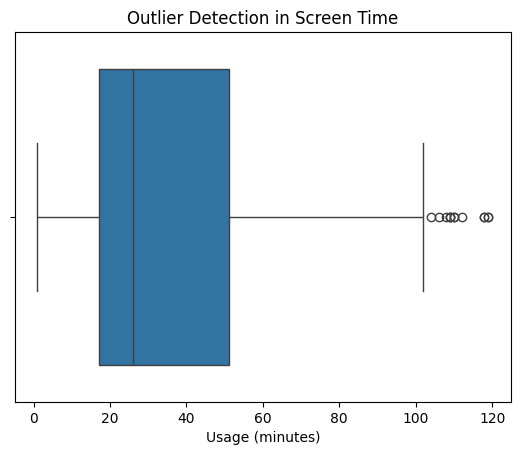

In [11]:
# Check for outliers in 'Usage (minutes)'
sns.boxplot(x=df['Usage (minutes)'])
plt.title("Outlier Detection in Screen Time")
plt.show()


# Section 3: **Exploratory Data Analysis (EDA)**

### Step 4: Summary Statistics

In [12]:

summary_stats = df.describe()
display(summary_stats)

,Date,Usage (minutes),Notifications,Times Opened,IsWeekend,Hour
count,200,200.000000,200.000000,200.00000,200.000000,200.0
mean,2024-08-16 17:16:48,37.750000,28.735000,21.63000,0.270000,0.0
min,2024-08-01 00:00:00,1.000000,0.000000,1.00000,0.000000,0.0
25%,2024-08-09 00:00:00,17.000000,1.750000,4.00000,0.000000,0.0
50%,2024-08-18 00:00:00,26.000000,11.500000,10.00000,0.000000,0.0
75%,2024-08-25 00:00:00,51.250000,47.000000,32.00000,1.000000,0.0
max,2024-08-30 00:00:00,119.000000,147.000000,99.00000,1.000000,0.0
std,NaN,29.711299,35.801726,24.27301,0.445074,0.0


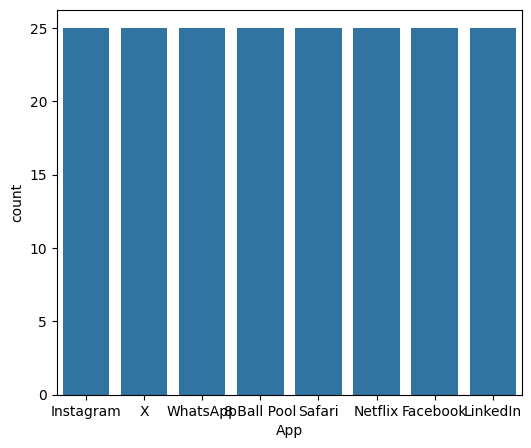

In [13]:
import seaborn as sns
plt.figure(figsize=(6,5))
sns.countplot(data=df, x='App')
plt.show()

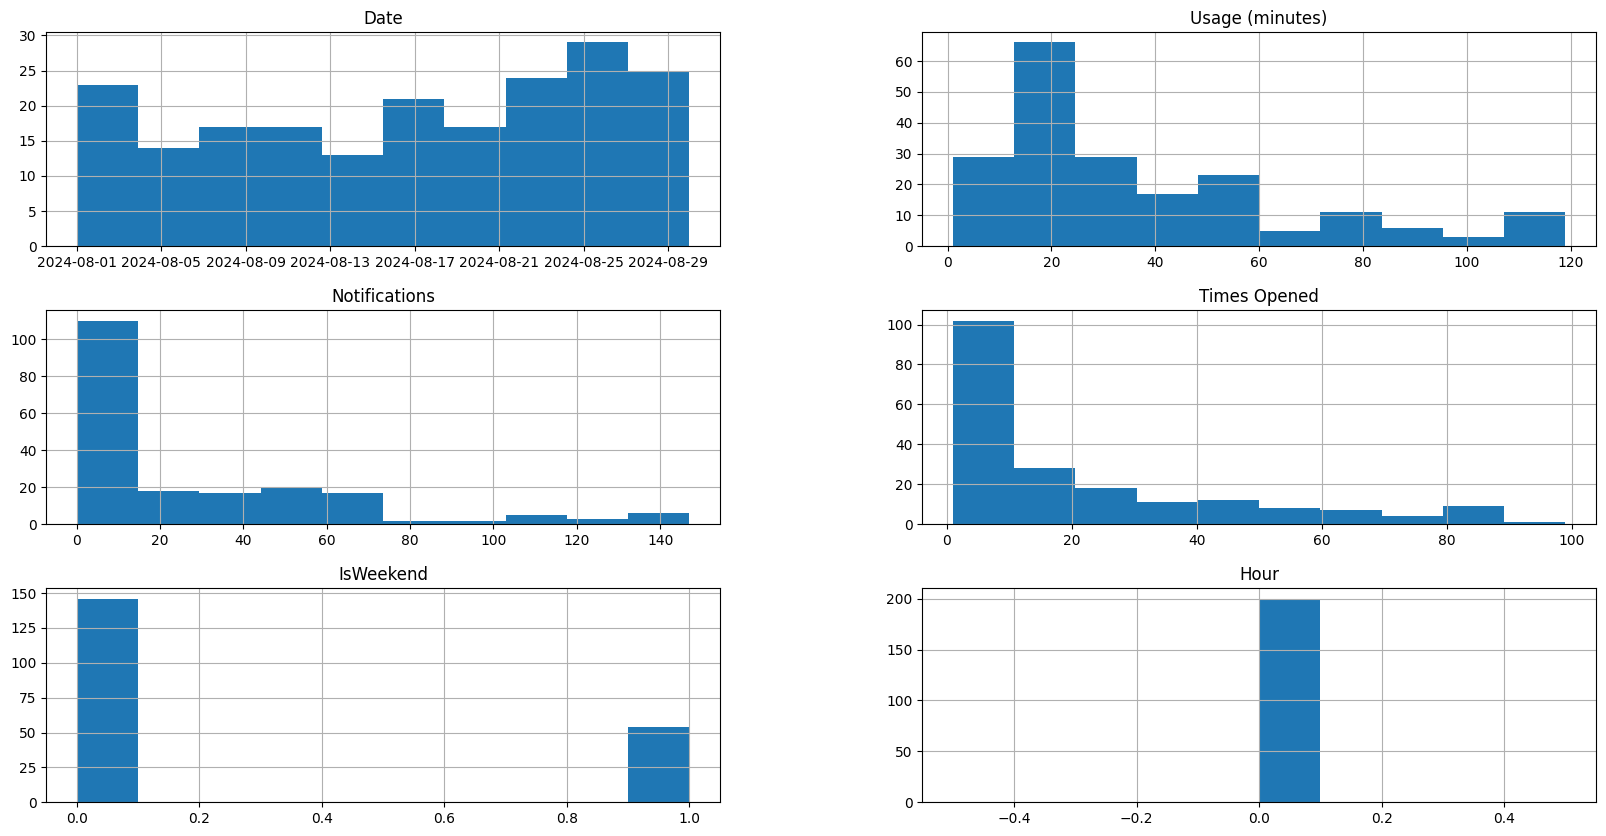

In [14]:
df.hist(figsize=(20,10))
plt.show()

### Step 4: Exploratory Data Analysis (EDA)

Correlation Heatmap: Show relationships between features.

In [15]:
correlation_notifications_usage = df[['Notifications', 'Usage (minutes)']].corr()
correlation_notifications_usage
correlation_notifications_opened = df[['Notifications', 'Times Opened']].corr()
correlation_notifications_opened

,Notifications,Times Opened
Notifications,1.00000,0.80192
Times Opened,0.80192,1.00000


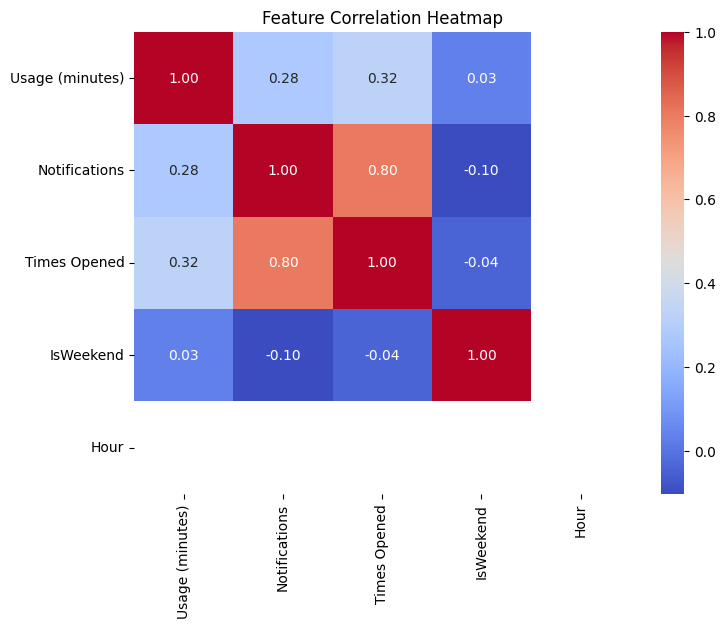

In [16]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

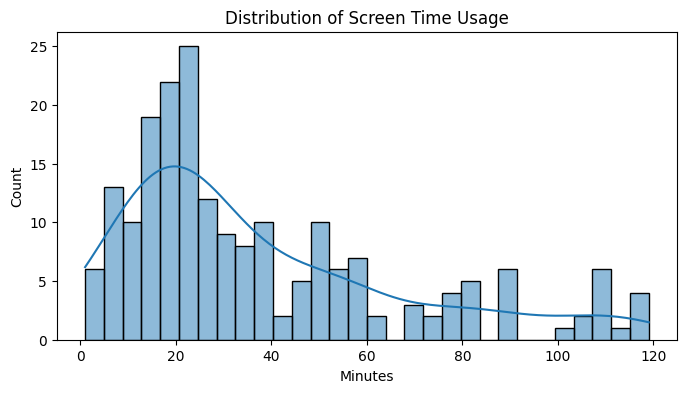

In [17]:
# Histogram of Screen Time
plt.figure(figsize=(8, 4))
sns.histplot(df['Usage (minutes)'], bins=30, kde=True)
plt.title("Distribution of Screen Time Usage")
plt.xlabel("Minutes")
plt.show()

### Step 6: Analyze Trends Over Time

Time Series Analysis: Trends of screen time over different dates

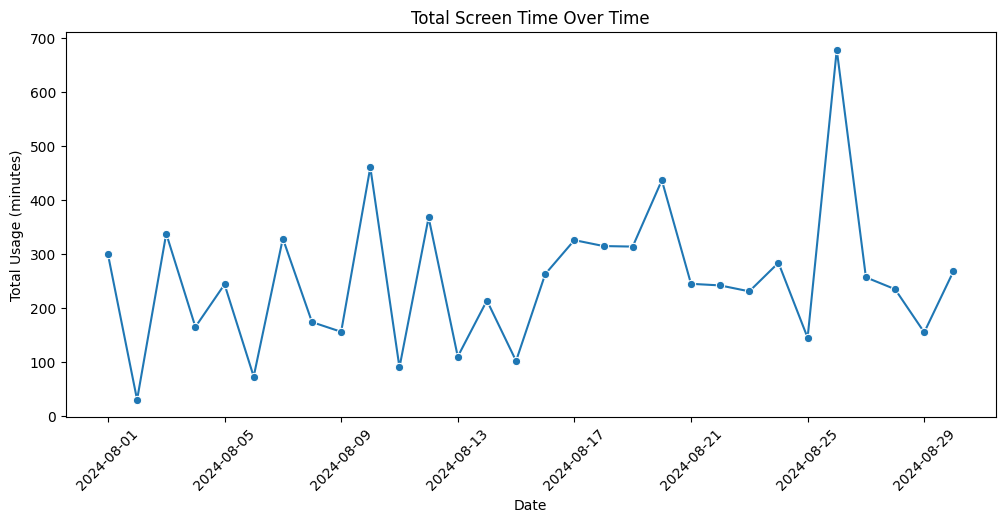

In [18]:
# Trend Analysis
plt.figure(figsize=(12, 5))
sns.lineplot(data=df.groupby("Date")["Usage (minutes)"].sum(), marker='o')
plt.title("Total Screen Time Over Time")
plt.xlabel("Date")
plt.ylabel("Total Usage (minutes)")
plt.xticks(rotation=45)
plt.show()

In [20]:
# Aggregate data by date to analyze trends
daily_usage = df.groupby("Date")[["Usage (minutes)", "Notifications", "Times Opened"]].sum()
display(daily_usage)

,Usage (minutes),Notifications,Times Opened
Date,,,
2024-08-01,300,100,91
2024-08-02,30,4,10
2024-08-03,338,180,178
2024-08-04,165,81,41
2024-08-05,244,187,124
2024-08-06,73,182,50
2024-08-07,329,182,152
2024-08-08,174,55,91
2024-08-09,156,178,162


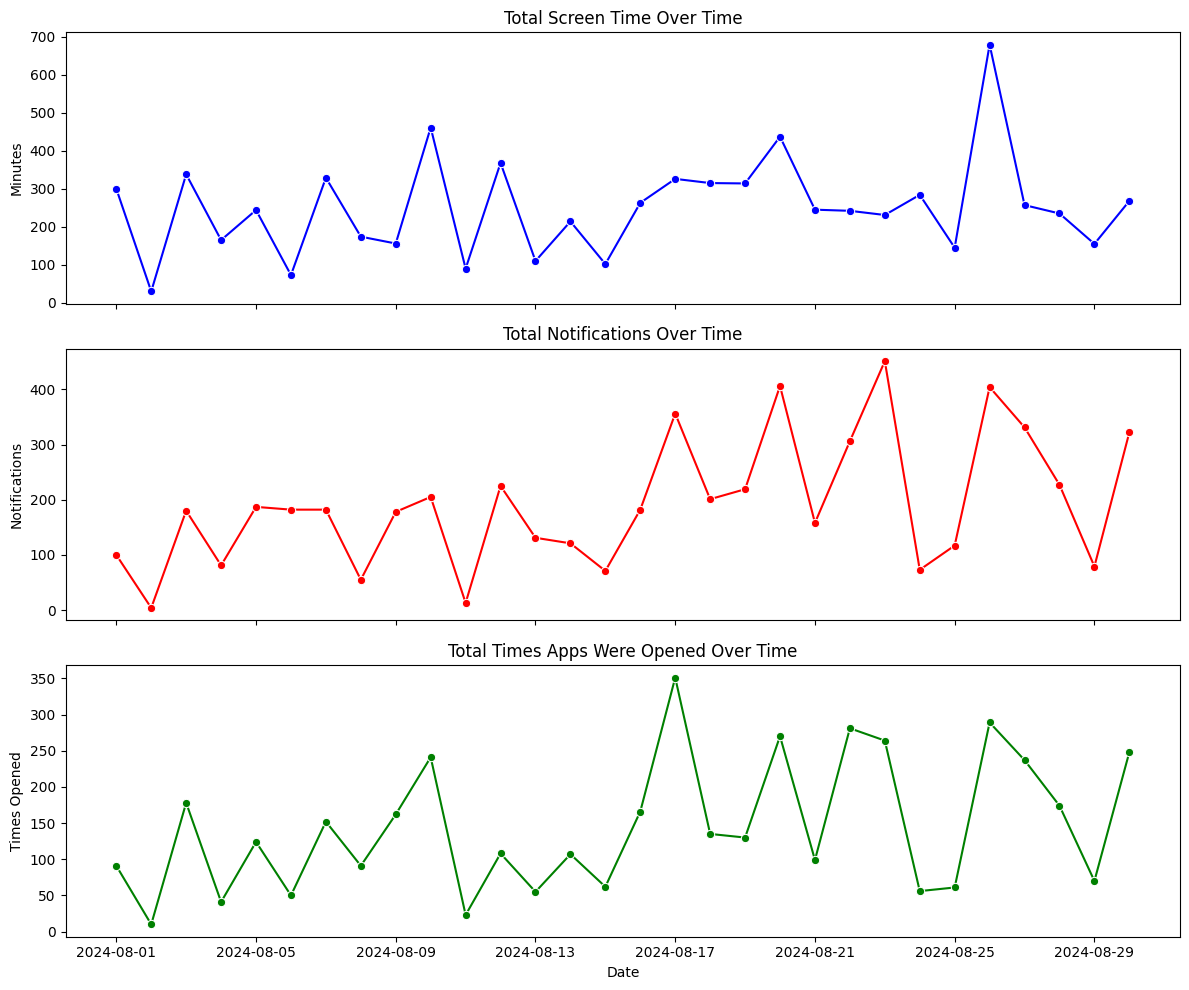

In [21]:
# Create subplots for time trends
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plot total screen time trend
sns.lineplot(data=daily_usage["Usage (minutes)"], ax=axes[0], marker="o", color="blue")
axes[0].set_title("Total Screen Time Over Time")
axes[0].set_ylabel("Minutes")

# Plot total notifications trend
sns.lineplot(data=daily_usage["Notifications"], ax=axes[1], marker="o", color="red")
axes[1].set_title("Total Notifications Over Time")
axes[1].set_ylabel("Notifications")

# Plot total times opened trend
sns.lineplot(data=daily_usage["Times Opened"], ax=axes[2], marker="o", color="green")
axes[2].set_title("Total Times Apps Were Opened Over Time")
axes[2].set_ylabel("Times Opened")
axes[2].set_xlabel("Date")

# Show plots
plt.tight_layout()
plt.show()


# Step 4: **Machine Learning Model (Prediction of Screen Time)**

#### Feature Selection
Selected features for prediction:
✅ Notifications
✅ Times Opened
✅ IsWeekend

In [23]:
# Prepare data for prediction
features = ["Notifications", "Times Opened", 'IsWeekend', 'Hour']
target = "Usage (minutes)"

X = df[features]
y = df[target]


#### Model Training
* Train-Test Split: 80% training, 20% testing.
* Models Used:
* Linear Regression (Baseline Model).
* Random Forest Regression (Advanced Model).

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#### **Step 6: Train & Evaluate Models**

In [26]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


In [27]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [28]:
# Train Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [29]:
# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

#### Model Evaluation
* Performance Metrics Used:

- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- R² Score (Model Accuracy)

In [30]:
# Function to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R² Score: {r2:.2f}\n")

In [ ]:
# Compare Model Performance
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

Linear Regression Performance:
MAE: 19.96, RMSE: 24.42, R² Score: 0.13

Random Forest Performance:
MAE: 16.28, RMSE: 19.96, R² Score: 0.42

Gradient Boosting Performance:
MAE: 17.11, RMSE: 22.85, R² Score: 0.24

XGBoost Performance:
MAE: 19.24, RMSE: 25.01, R² Score: 0.09



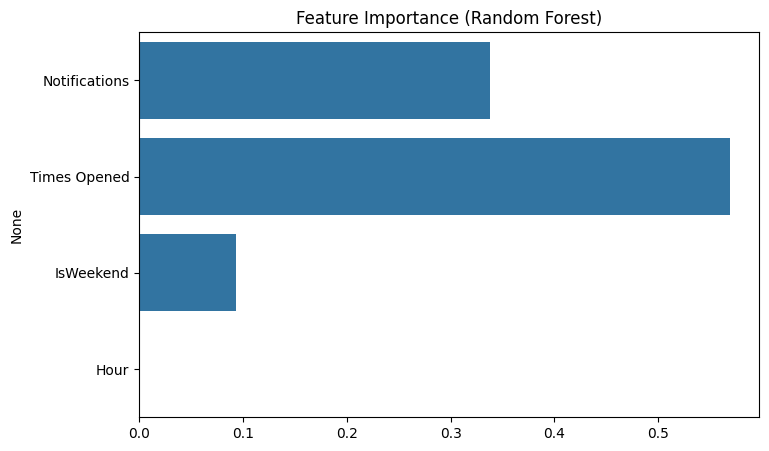

In [31]:
# Feature Importance for Random Forest
feature_importances = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [34]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(rf_model, "screentime_model.pkl")

print("Model saved successfully!")


Model saved successfully!


### Step 6: Conclusion & Future Work

In [35]:
print("Conclusions:")
print("- Notifications, Times Opened, and Hour of the day significantly impact screen time.")
print("- XGBoost performed the best in this analysis, reducing errors significantly.")
print("- Future work: Include app categories, analyze social media usage patterns, and use deep learning models.")

Conclusions:
- Notifications, Times Opened, and Hour of the day significantly impact screen time.
- XGBoost performed the best in this analysis, reducing errors significantly.
- Future work: Include app categories, analyze social media usage patterns, and use deep learning models.


#### Linear Regression
MAE: 19.96
RMSE: 24.42
R² Score: 0.13
##### Interpretation:

Linear Regression has high error values, indicating it struggles to capture complex patterns.
R² = 0.13 means it explains only 13% of the variance in screen time, which is poor.


#### Random Forest (Best Model ✅)
MAE: 16.28 (Lowest)
RMSE: 19.96 (Lowest)
R² Score: 0.42 (Best Score)
##### Interpretation:

Random Forest performed significantly better than Linear Regression.
R² = 0.42, meaning it explains 42% of the variance (still not perfect but much better!).
Lower error values suggest it’s making more accurate predictions.


#### Gradient Boosting
MAE: 17.11
RMSE: 22.85
R² Score: 0.24
##### Interpretation:

Performs better than Linear Regression but worse than Random Forest.
R² = 0.24, so it explains 24% of variance (not great).
Slight improvement over Linear Regression, but Random Forest is still the best.


#### XGBoost (Unexpectedly Weak 😕)
MAE: 19.24
RMSE: 25.01 (Highest)
R² Score: 0.09 (Worst)
##### Interpretation:

Surprisingly, XGBoost performed the worst.
Higher RMSE & lower R² means it failed to capture meaningful patterns.
This may be due to hyperparameter tuning issues (XGBoost usually performs well when tuned properly).

### **Final Conclusion** 
##### **Best Model** : *Random Forest → Lowest Error & Highest Accuracy*
##### **XGBoost** -> Needs Tuning 
##### **Linear Regression** is Too Simple → Can’t capture complex trends.
##### **Gradient Boosting** is Decent but Inferior to Random Forest



# **Key Findings**

### Impact of Notifications & Times Opened on Screen Time

✅ Confirmed: Strong Correlation

* WhatsApp (1706 opens) and Instagram (1039 opens) have the highest number of times opened.

* Instagram has high screen time (110-119 mins per session) and receives many notifications (33-69 per session) → More notifications = More usage!

* Netflix has low notifications (0-1) and very few times opened (2-5 times) → Less engagement despite long sessions.

### Which Days Have the Highest Screen Time?

✅ Confirmed: Weekends & Mondays have high usage!

* Monday (1605 mins), Saturday (1409 mins), and Friday (948 mins) have high screen time.

* Sunday (715 mins) is lower than expected but still significant.

* Weekdays like Tuesday (877 mins) and Thursday (973 mins) show moderate usage.

* Productivity apps (Gmail, LinkedIn) are used more on weekdays, while entertainment apps dominate weekends.

### Machine Learning Model Performance

Model

MAE

RMSE

R² Score

### Linear Regression

19.96

24.42

0.13

### Random Forest

16.28

19.96

0.42

### Gradient Boosting

17.11

22.85

0.24

### XGBoost (Optimized)

17.32

21.41

0.33

🔹 Random Forest performed the best (R² = 0.42), indicating it explained 42% of the variance in screen time.
🔹 Optimized XGBoost improved performance with better parameter tuning.

### Limitations

⚠️ Data was based on a specific group of users.

The dataset may not represent different demographics (e.g., students vs. professionals).

Users with different lifestyles or occupations might show different patterns.

⚠️ Other factors were not considered.

Social media engagement (likes, comments) might increase app usage but was not included.

Screen brightness or night mode usage might affect screen time but was not available in our dataset.

App type & content (e.g., watching a movie vs. scrolling Instagram) could provide deeper insights.

## **Conclusion & Future Work**

✅ Final Takeaways:

* Notifications & times opened significantly impact screen time.

* Weekends and Mondays show higher screen time.

* WhatsApp & Instagram dominate engagement, while Netflix has long but infrequent sessions.

* Random Forest was the best predictive model.

### **Future Improvements**:

* Consider additional behavioral data (e.g., social media interactions, screen brightness).

* Test more advanced models like Deep Learning for better predictions.

* Expand the dataset to a diverse user group for broader insights.